## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [2]:
import pandas as pd

df = pd.read_csv('data/results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
df.describe()

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41586 entries, 0 to 41585
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41586 non-null  object
 1   home_team   41586 non-null  object
 2   away_team   41586 non-null  object
 3   home_score  41586 non-null  int64 
 4   away_score  41586 non-null  int64 
 5   tournament  41586 non-null  object
 6   city        41586 non-null  object
 7   country     41586 non-null  object
 8   neutral     41586 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [19]:
FIFA_home_df = df.loc[df['tournament']=='FIFA World Cup'].sort_values(by=['home_score'], ascending=False).nlargest(5,'home_score',keep='all')
FIFA_home_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
12266,1982-06-15,Hungary,El Salvador,10,1,FIFA World Cup,Elche,Spain,True
3648,1954-06-17,Hungary,South Korea,9,0,FIFA World Cup,Zürich,Switzerland,True
9024,1974-06-18,Yugoslavia,DR Congo,9,0,FIFA World Cup,Gelsenkirchen,Germany,True
24794,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,Sapporo,Japan,True
1684,1934-05-27,Italy,United States,7,1,FIFA World Cup,Rome,Italy,False
3131,1950-07-09,Brazil,Sweden,7,1,FIFA World Cup,Rio de Janeiro,Brazil,False
32168,2010-06-21,Portugal,North Korea,7,0,FIFA World Cup,Cape Town,South Africa,True
3658,1954-06-23,Germany,Turkey,7,2,FIFA World Cup,Zürich,Switzerland,True
4356,1958-06-08,France,Paraguay,7,3,FIFA World Cup,Norrköping,Sweden,True


In [31]:
FIFA_away_df = df.loc[df['tournament']=='FIFA World Cup'].sort_values(by=['away_score'], ascending=False).nlargest(5,'away_score',keep='all')
FIFA_away_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3125,1950-07-02,Bolivia,Uruguay,0,8,FIFA World Cup,Belo Horizonte,Brazil,True
2102,1938-06-12,Cuba,Sweden,0,8,FIFA World Cup,Antibes,France,True
3655,1954-06-20,Germany,Hungary,3,8,FIFA World Cup,Basel,Switzerland,True
9027,1974-06-19,Haiti,Poland,0,7,FIFA World Cup,Munich,Germany,True
3661,1954-06-26,Switzerland,Austria,5,7,FIFA World Cup,Lausanne,Switzerland,False
36155,2014-07-08,Brazil,Germany,1,7,FIFA World Cup,Belo Horizonte,Brazil,False
3653,1954-06-19,Scotland,Uruguay,0,7,FIFA World Cup,Basel,Switzerland,True
3656,1954-06-20,South Korea,Turkey,0,7,FIFA World Cup,Geneva,Switzerland,True


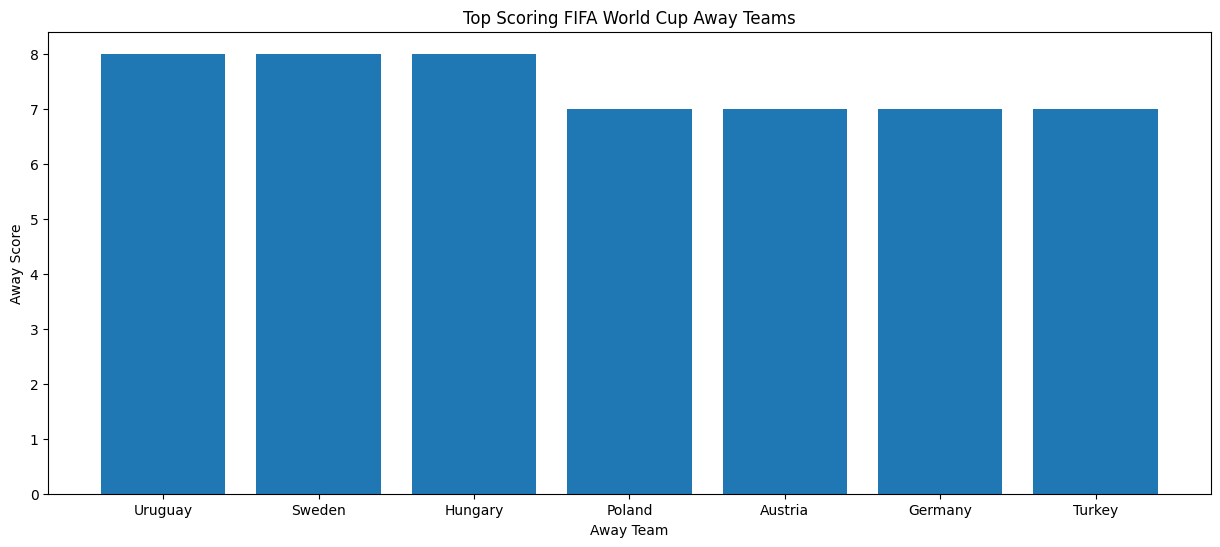

In [32]:
import matplotlib.pyplot as plt

x = FIFA_away_df['away_team']
y = FIFA_away_df['away_score']

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x,y)

ax.set_xlabel('Away Team')
ax.set_ylabel('Away Score')
ax.set_title('Top Scoring FIFA World Cup Away Teams')
plt.show()

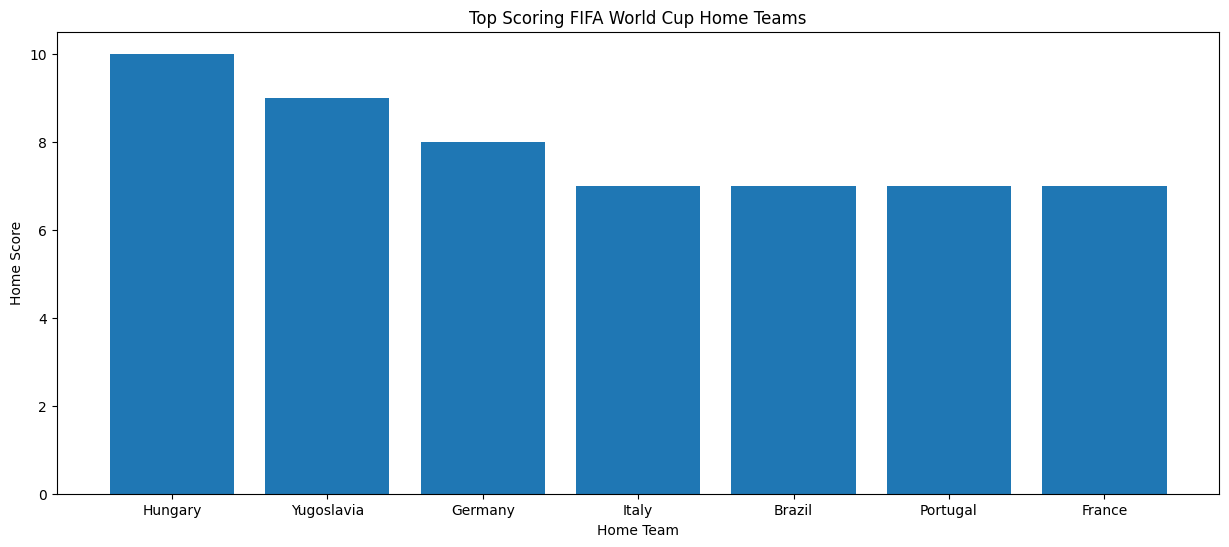

In [33]:
x = FIFA_home_df['home_team']
y = FIFA_home_df['home_score']

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x,y)

ax.set_xlabel('Home Team')
ax.set_ylabel('Home Score')
ax.set_title('Top Scoring FIFA World Cup Home Teams')
plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [13]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [39]:
matches = df.groupby('tournament').agg(n_matches = ("date","count")).sort_values(by="n_matches", ascending = False)
matches

,n_matches
tournament,
Friendly,17029
FIFA World Cup qualification,7236
UEFA Euro qualification,2582
African Cup of Nations qualification,1672
FIFA World Cup,900
...,...
Dragon Cup,4
World Unity Cup,4
Copa América qualification,2


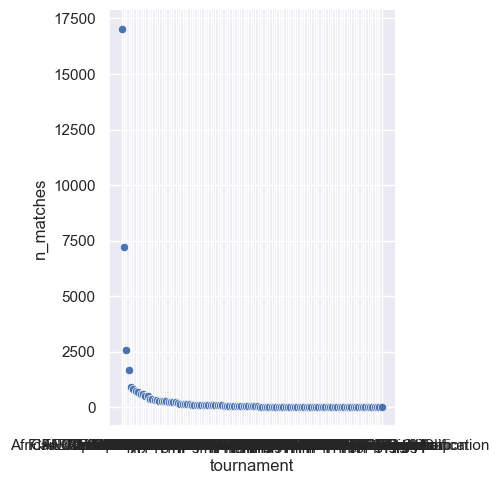

In [40]:
import seaborn as sns

sns.set_theme()

# Create a visualization
sns.relplot(
    data=matches,
    x='tournament',
    y='n_matches',
)

## Task 
Show the trend in number of matches per year.

In [41]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [42]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [48]:
matches_per_year = df.groupby('year').agg(n_matches = ("year","count")).sort_values(by="n_matches", ascending = False).reset_index()
matches_per_year

,year,n_matches
0,2019,1155
1,2008,1091
2,2011,1081
3,2004,1064
4,2000,1026
...,...,...
144,1876,2
145,1874,1
146,1873,1
147,1875,1


(0.0, 1200.0)

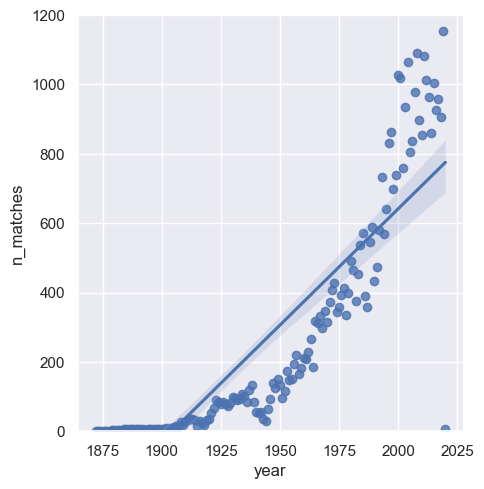

In [50]:
# Create a visualization
sns.lmplot(data=matches_per_year, x="year", y="n_matches")

import matplotlib.pyplot as plt
plt.ylim(0, 1200)

## Task
Which teams are the most successful ones? (winning percentage)

In [51]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [59]:
# create a new column to show the winner of each match

import numpy as np

conditions = [
    (df['home_score']>df['away_score']),
    (df['away_score']>df['home_score']),
    (df['away_score']==df['home_score'])
]

values = [df['home_team'],df['away_team'],"tie"]

df['winner'] = np.select(conditions, values)

df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland


In [62]:
# determine the total number of matches played by each team

games_played = pd.concat([df.home_team,df.away_team]).value_counts()
games_played

Sweden       1018
England      1009
Brazil        981
Argentina     980
Germany       949
             ... 
Niue            2
Palau           2
Asturias        1
Madrid          1
Surrey          1
Length: 312, dtype: int64

In [70]:
# get the win_percentage for each team

win_percent = (df.winner.value_counts() / games_played)*100
win_percent.sort_values(ascending=False).head(25)

Surrey                100.000000
Asturias              100.000000
Canary Islands         75.000000
Yorkshire              71.428571
Padania                67.441860
Jersey                 67.073171
County of Nice         66.666667
Parishes of Jersey     66.666667
Basque Country         64.912281
Brazil                 63.710499
Andalusia              61.538462
Rhodes                 61.111111
Crimea                 60.000000
Isle of Man            59.183673
Northern Cyprus        58.823529
Spain                  58.501441
Germany                58.482613
Cascadia               57.142857
England                56.689792
Artsakh                54.545455
Kernow                 54.545455
Iran                   54.509018
Czech Republic         53.872054
Argentina              53.673469
Croatia                53.459119
dtype: float64

In [74]:
df[(df['home_team']=='Canary Islands') | (df['away_team']=='Canary Islands')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner
19388,1996-02-06,Canary Islands,Venezuela,5,1,Friendly,Las Palmas,Spain,False,1996,Canary Islands
21706,1998-12-22,Canary Islands,Latvia,4,0,Friendly,Las Palmas,Spain,False,1998,Canary Islands
24764,2002-05-17,Canary Islands,Venezuela,0,2,Friendly,Las Palmas,Spain,False,2002,Venezuela
29871,2007-12-29,Canary Islands,Angola,2,0,Friendly,Las Palmas,Spain,False,2007,Canary Islands


In [58]:
from collections import Counter

Counter(df['winner']).most_common()

[('tie', 9578),
 ('Brazil', 625),
 ('England', 572),
 ('Germany', 555),
 ('Argentina', 526),
 ('Sweden', 500),
 ('South Korea', 454),
 ('Mexico', 439),
 ('Hungary', 434),
 ('Italy', 423),
 ('France', 417),
 ('Spain', 406),
 ('Netherlands', 398),
 ('Uruguay', 382),
 ('Scotland', 371),
 ('Denmark', 356),
 ('Russia', 356),
 ('Poland', 351),
 ('Belgium', 333),
 ('Zambia', 328),
 ('Austria', 323),
 ('Egypt', 310),
 ('Romania', 305),
 ('Japan', 302),
 ('Saudi Arabia', 298),
 ('Portugal', 296),
 ('United States', 294),
 ('Norway', 293),
 ('Chile', 290),
 ('Trinidad and Tobago', 290),
 ('China PR', 287),
 ('Ghana', 286),
 ('Ivory Coast', 281),
 ('Switzerland', 280),
 ('Iran', 272),
 ('Nigeria', 267),
 ('Uganda', 266),
 ('Costa Rica', 257),
 ('Australia', 257),
 ('Paraguay', 255),
 ('Iraq', 251),
 ('Bulgaria', 250),
 ('Morocco', 247),
 ('Kenya', 243),
 ('Tunisia', 243),
 ('Thailand', 237),
 ('Kuwait', 237),
 ('Senegal', 233),
 ('Cameroon', 232),
 ('Yugoslavia', 223),
 ('Czechoslovakia', 222),
 

## Task
Which teams are the least successful ones? (winning percentage)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

## Task
Which teams played against each other the most?

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.